In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [89]:
def gaussian_pdf(x, mu=0, sigma=1):
        u = (x - mu) / abs(sigma)
        y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
        return y * np.exp(-0.5 * u**2)

In [90]:
def uniform_pdf(x):
    return 1 * ((x >= 0) & (x <= 1))

In [91]:
def kernel_smoothed_density(x_values, samples, width=0.3, kernel_function=gaussian_pdf):
    # Generate an array of kernel values centred on the samples
    kernel_values = [kernel_function(x_value, samples, width) for x_value in x_values]
    return np.average(kernel_values, axis=1)

In [92]:
# General global variables
color1 = 'steelblue'
color2 = 'firebrick'
color3 = 'seagreen'
color4 = 'darkorange'

### Section 1: Uniform and normal random variables

In [93]:
X_gaussian = np.random.randn(10000)
X_uniform = np.random.rand(10000)

Histograms of random samples compared with true pdf

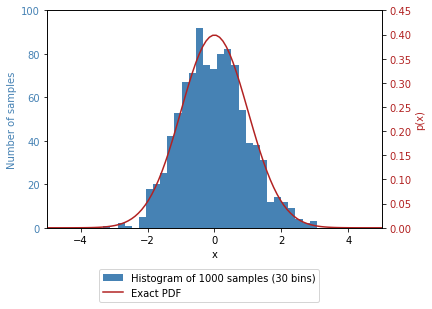

In [94]:
fig, ax1 = plt.subplots()

ax1.hist(X_gaussian[:1000], bins=30, color=color1, label='Histogram of 1000 samples (30 bins)')
ax1.set_xlabel('x')
ax1.set_ylabel('Number of samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 100)


ax2 = ax1.twinx()
x = np.linspace(-5, 5, 100)
ax2.plot(x, gaussian_pdf(x), color=color2, label='Exact PDF')
ax2.set_ylabel('p(x)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 0.45)
ax2.set_xlim(-5, 5)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/gaussian_histogram_and_pdf.png', bbox_inches='tight')

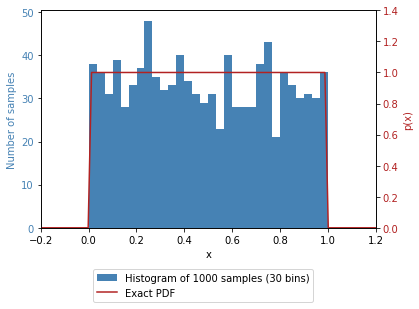

In [95]:
fig, ax1 = plt.subplots()

x = np.linspace(-0.2, 1.2, 100)

ax1.hist(X_uniform[:1000], bins=30, color=color1, label='Histogram of 1000 samples (30 bins)')
ax1.set_xlabel('x')
ax1.set_ylabel('Number of samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
ax2.plot(x, uniform_pdf(x), color=color2, label='Exact PDF')
ax2.set_ylabel('p(x)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1.4)
ax2.set_xlim(-0.2, 1.2)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/uniform_histogram_and_pdf.png', bbox_inches='tight')

Kernel smoothing of random samples compared with true pdf

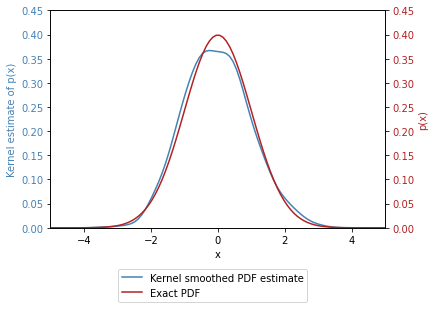

In [96]:
fig, ax1 = plt.subplots()

x = np.linspace(-5, 5, 100)

ax1.plot(x, kernel_smoothed_density(x, X_gaussian[:1000]), color=color1, label='Kernel smoothed PDF estimate')
ax1.set_xlabel('x')
ax1.set_ylabel('Kernel estimate of p(x)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 0.45)

ax2 = ax1.twinx()
ax2.plot(x, gaussian_pdf(x), color=color2, label='Exact PDF')
ax2.set_ylabel('p(x)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 0.45)
ax2.set_xlim(-5, 5)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))
plt.savefig('figures/gaussian_kernel_smoothed.png', bbox_inches='tight')

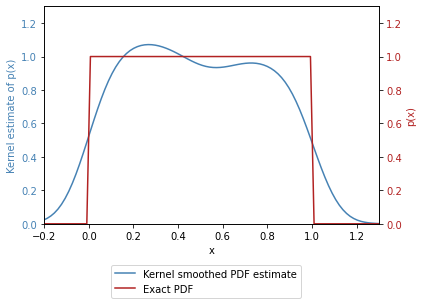

In [97]:
fig, ax1 = plt.subplots()

x = np.linspace(-0.3, 1.3, 100)

ax1.plot(x, kernel_smoothed_density(x, X_uniform[:1000], width=0.1), color=color1, label='Kernel smoothed PDF estimate')
ax1.set_xlabel('x')
ax1.set_ylabel('Kernel estimate of p(x)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 1.3)


ax2 = ax1.twinx()
ax2.plot(x, uniform_pdf(x), color=color2, label='Exact PDF')
ax2.set_ylabel('p(x)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1.3)
ax2.set_xlim(-0.2, 1.3)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))
plt.savefig('figures/uniform_kernel_smoothed.png', bbox_inches='tight')

#### Multinomial theory: Uniform distribution

In [98]:
def plot_uniform_histogram_mean_sd(N, nbins=30):
    plt.figure()
    
    plt.hist(X_uniform[:N], bins=nbins, color=color1, label=f'Histogram of {N} samples ({nbins} bins)')

    bin_width = 1 / nbins
    mean = N * bin_width
    sd = np.sqrt(N * bin_width * (1 - bin_width))
    plt.hlines(y=mean, xmin=0, xmax=1, color=color2, label=r'$\mu$ (theoretical)')
    plt.hlines(y=[mean + 3 * sd, mean - 3 * sd], xmin=0, xmax=1, color=color3, label='$\pm 3 \sigma$ (theoretical)')
    
    plt.xlabel('x')
    plt.ylabel('Number of samples')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
    plt.savefig(f'figures/uniform_histogram_{N}.png', bbox_inches='tight')

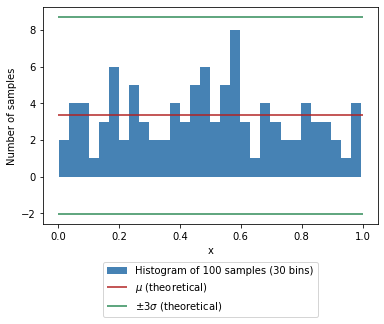

In [99]:
plot_uniform_histogram_mean_sd(100)

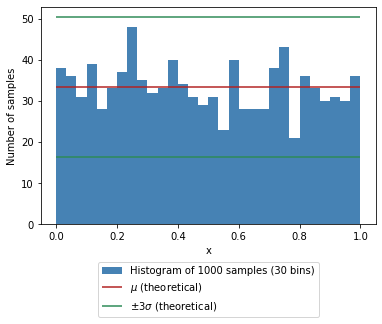

In [100]:
plot_uniform_histogram_mean_sd(1000)

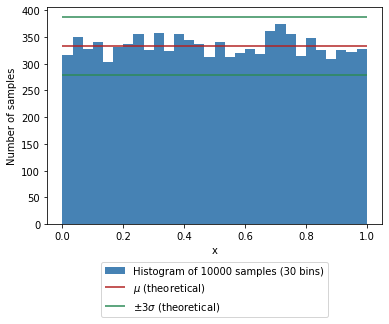

In [101]:
plot_uniform_histogram_mean_sd(10000)

#### Multinomial theory: Gaussian distribution

In [102]:
def plot_gaussian_histogram_mean_sd(N, nbins=30):
    plt.figure()
    
    bin_counts, bin_edges, patches = plt.hist(X_gaussian[:N], bins=nbins,
                                              color=color1, label=f'Histogram of {N} samples ({nbins} bins)')
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_probabilities = norm.cdf(bin_edges[1:]) - norm.cdf(bin_edges[:-1])

    bin_means = N * bin_probabilities
    bin_sds = np.sqrt(N * bin_probabilities * (1 - bin_probabilities))
    
    plt.errorbar(x=bin_centres, y=bin_means,
                 yerr=3*bin_sds,
                 color=color2, fmt='o', capsize=2,
                 label=r'$\mu \pm 3\sigma$ (theoretical)')
    
    plt.xlim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('Number of samples')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
    plt.savefig(f'figures/gaussian_histogram_{N}.png', bbox_inches='tight')

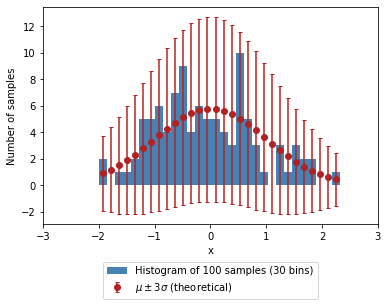

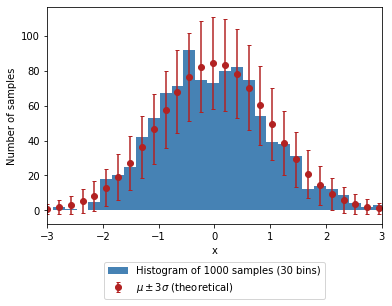

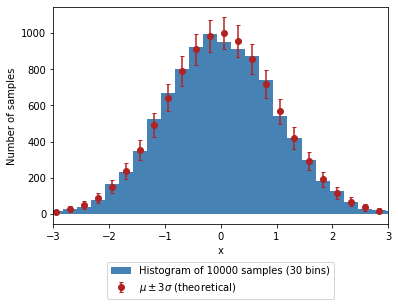

In [103]:
plot_gaussian_histogram_mean_sd(100)
plot_gaussian_histogram_mean_sd(1000)
plot_gaussian_histogram_mean_sd(10000)

### Section 2: Functions of Random Variables

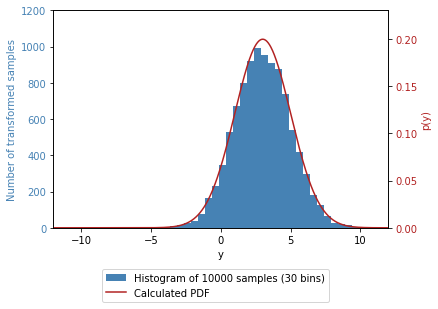

In [104]:
fig, ax1 = plt.subplots()

Y = 2 * X_gaussian[:10000] + 3
ax1.hist(Y, bins=30, color=color1, label='Histogram of 10000 samples (30 bins)')
ax1.set_xlabel('y')
ax1.set_ylabel('Number of transformed samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 1200)


ax2 = ax1.twinx()
x = np.linspace(-12, 12, 1000)
ax2.plot(x, gaussian_pdf(x, mu=3, sigma=2), color=color2, label='Calculated PDF')
ax2.set_ylabel('p(y)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 0.23)
ax2.set_xlim(-12, 12)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/linear_function_of_gaussian.png', bbox_inches='tight')

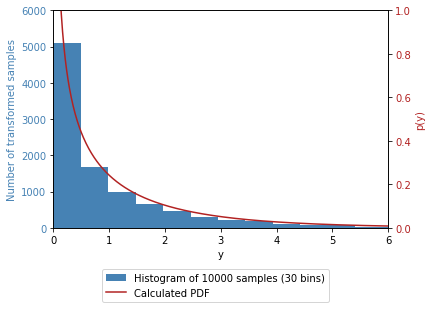

In [105]:
fig, ax1 = plt.subplots()

Y = X_gaussian[:10000] ** 2
ax1.hist(Y, bins=30, color=color1, label='Histogram of 10000 samples (30 bins)')
ax1.set_xlabel('y')
ax1.set_ylabel('Number of transformed samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 6000)


ax2 = ax1.twinx()
x = np.linspace(0.01, 12, 1000)
pdf = np.exp(-0.5*x) / np.sqrt(2*np.pi*x)
ax2.plot(x, pdf, color=color2, label='Calculated PDF')
ax2.set_ylabel('p(y)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1)
ax2.set_xlim(0, 6)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/quadratic_function_of_gaussian.png', bbox_inches='tight')

In [ ]:
# p(x) = U(0, 2 pi)
# y = f(x) = sin(x)
# p(y) = y/sqrt(1-y^2)

### Section 3: iCDF method

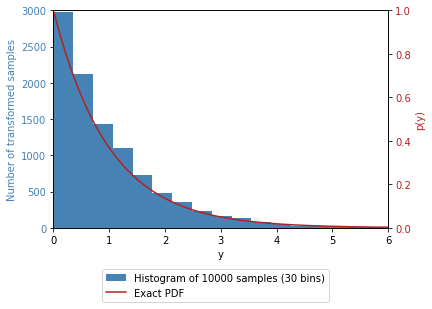

In [106]:
fig, ax1 = plt.subplots()

Y = -np.log(1 - X_uniform[:10000])

ax1.hist(Y, bins=30, color=color1, label='Histogram of 10000 samples (30 bins)')
ax1.set_xlabel('y')
ax1.set_ylabel('Number of transformed samples', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 3000)


ax2 = ax1.twinx()
x = np.linspace(0.01, 12, 1000)
pdf = np.exp(-x)
ax2.plot(x, pdf, color=color2, label='Exact PDF')
ax2.set_ylabel('p(y)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1)
ax2.set_xlim(0, 6)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0))

plt.savefig('figures/icdf_exponential.png', bbox_inches='tight')

### Section 4: Simulation from non-standard densities

In [107]:
def nonstandard_samples(N, alpha=1.5):
    exponential_samples = (-2 / (alpha ** 2)) * np.log(1 - X_uniform[:N])
    return X_gaussian[:N] * exponential_samples

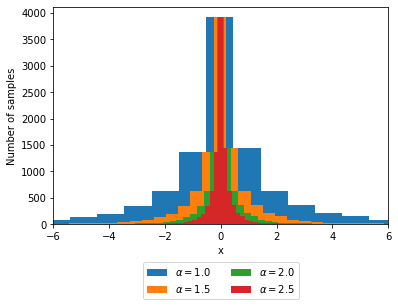

In [108]:
plt.figure()
N = 100000
for i in np.arange(0, 4):
    alpha = (i/2) + 1
    plt.hist(nonstandard_samples(N, alpha), bins=100, label=r'$\alpha = {}$'.format(alpha))

plt.xlabel('x')
plt.ylabel('Number of samples')
plt.xlim(-6, 6)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.savefig(f'figures/nonstandard_distribution.png', bbox_inches='tight')

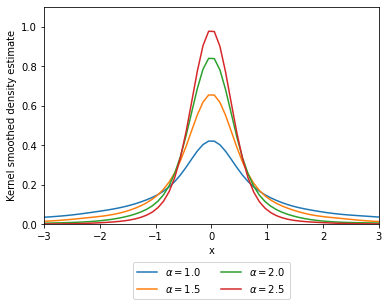

In [109]:
plt.figure()

N = 100000
x = np.linspace(-5, 5, 100)

for i in np.arange(0, 4):
    alpha = i/2 + 1
    plt.plot(x, kernel_smoothed_density(x, nonstandard_samples(N, alpha)), label=r'$\alpha = {}$'.format(alpha))

plt.xlabel('x')
plt.ylabel('Kernel smoothed density estimate')
plt.xlim(-3, 3)
plt.ylim(0, 1.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.savefig(f'figures/nonstandard_distribution_ksdensity.png', bbox_inches='tight')

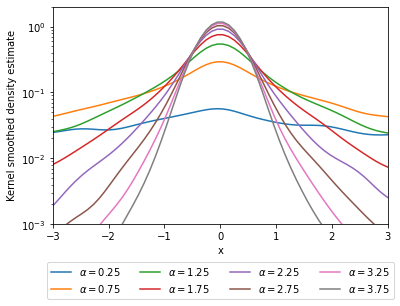

In [110]:
plt.figure()

N = 100000
x = np.linspace(-5, 5, 100)

for i in np.arange(0, 8):
    alpha = i/2 + 0.25
    plt.semilogy(x, kernel_smoothed_density(x, nonstandard_samples(N, alpha)), label=r'$\alpha = {}$'.format(alpha))

plt.xlabel('x')
plt.ylabel('Kernel smoothed density estimate')
plt.xlim(-3, 3)
plt.ylim(1e-3, 2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.savefig(f'figures/nonstandard_distribution_ksdensity_log_close.png', bbox_inches='tight')

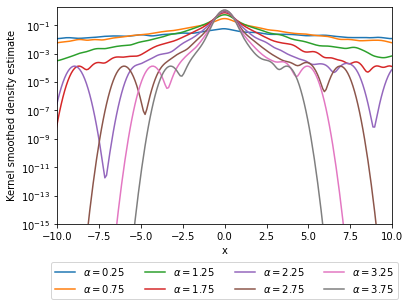

In [111]:
plt.figure()

N = 100000
x = np.linspace(-50, 50, 1000)

for i in np.arange(0, 8):
    alpha = i/2 + 0.25
    plt.semilogy(x, kernel_smoothed_density(x, nonstandard_samples(N, alpha)), label=r'$\alpha = {}$'.format(alpha))

plt.xlabel('x')
plt.ylabel('Kernel smoothed density estimate')
plt.xlim(-10, 10)
plt.ylim(1e-15, 2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.savefig(f'figures/nonstandard_distribution_ksdensity_log_far.png', bbox_inches='tight')